# Лабораторная работа №2

В качестве набора данных мы будем использовать набор данных о популярных книгах - https://www.kaggle.com/datasets/tanmay43sharma/goodreads-popular-books-dataset



Каждый файл содержит в себе следющие колонки:

- book_id
- goodreads_book_id
- best_book_id
- work_id
- books_count
- isbn
- isbn13
- authors
- original_publication_year
- original_title
- title
- language_code
- average_rating
- ratings_count
- work_ratings_count
- work_text_reviews_count
- ratings_1
- ratings_2
- ratings_3
- ratings_4
- ratings_5
- image_url
- small_image_url

## Загрузка и первичный анализ данных

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [3]:
# Будем анализировать данные только на обучающей выборке
data = pd.read_csv('./books.csv', sep=",")

In [4]:
# Размер датасета - 1816 строк, 10 колонок
data.shape

(1354, 23)

In [5]:
# Список колонок с типами данных
data.dtypes

book_id                        int64
goodreads_book_id              int64
best_book_id                   int64
work_id                        int64
books_count                    int64
isbn                          object
isbn13                       float64
authors                       object
original_publication_year    float64
original_title                object
title                         object
language_code                 object
average_rating               float64
ratings_count                  int64
work_ratings_count             int64
work_text_reviews_count        int64
ratings_1                      int64
ratings_2                      int64
ratings_3                      int64
ratings_4                      int64
ratings_5                      int64
image_url                     object
small_image_url               object
dtype: object

In [6]:
# проверим есть ли пропущенные значения
data.isnull().sum()

book_id                        0
goodreads_book_id              0
best_book_id                   0
work_id                        0
books_count                    0
isbn                          52
isbn13                        44
authors                        0
original_publication_year      3
original_title                52
title                          0
language_code                109
average_rating                 0
ratings_count                  0
work_ratings_count             0
work_text_reviews_count        0
ratings_1                      0
ratings_2                      0
ratings_3                      0
ratings_4                      0
ratings_5                      0
image_url                      0
small_image_url                0
dtype: int64

In [7]:
# Первые 5 строк датасета
data.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,6,11870085,11870085,16827462,226,525478817,9.780525e+12,John Green,2012.0,The Fault in Our Stars,...,2346404,2478609,140739,47994,92723,327550,698471,1311871,https://images.gr-assets.com/books/1360206420m...,https://images.gr-assets.com/books/1360206420s...
4,12,13335037,13335037,13155899,210,62024035,9.780062e+12,Veronica Roth,2011.0,Divergent,...,1903563,2216814,101023,36315,82870,310297,673028,1114304,https://images.gr-assets.com/books/1328559506m...,https://images.gr-assets.com/books/1328559506s...


In [9]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 1354


## Обработка пропусков в данных

### Простые стратегии - удаление или заполнение нулями

In [11]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((1354, 23), (1354, 18))

In [10]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((1354, 23), (1153, 23))

In [12]:
data.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,6,11870085,11870085,16827462,226,525478817,9.780525e+12,John Green,2012.0,The Fault in Our Stars,...,2346404,2478609,140739,47994,92723,327550,698471,1311871,https://images.gr-assets.com/books/1360206420m...,https://images.gr-assets.com/books/1360206420s...
4,12,13335037,13335037,13155899,210,62024035,9.780062e+12,Veronica Roth,2011.0,Divergent,...,1903563,2216814,101023,36315,82870,310297,673028,1114304,https://images.gr-assets.com/books/1328559506m...,https://images.gr-assets.com/books/1328559506s...


In [13]:
# Заполнение всех пропущенных значений нулями
# В данном случае это некорректно, так как нулями заполняются в том числе категориальные колонки
data_new_3 = data.fillna(0)
data_new_3.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,6,11870085,11870085,16827462,226,525478817,9.780525e+12,John Green,2012.0,The Fault in Our Stars,...,2346404,2478609,140739,47994,92723,327550,698471,1311871,https://images.gr-assets.com/books/1360206420m...,https://images.gr-assets.com/books/1360206420s...
4,12,13335037,13335037,13155899,210,62024035,9.780062e+12,Veronica Roth,2011.0,Divergent,...,1903563,2216814,101023,36315,82870,310297,673028,1114304,https://images.gr-assets.com/books/1328559506m...,https://images.gr-assets.com/books/1328559506s...


### "Внедрение значений" - импьютация (imputation)

#### Обработка пропусков в числовых данных

In [14]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка isbn13. Тип данных float64. Количество пустых значений 44, 3.25%.
Колонка original_publication_year. Тип данных float64. Количество пустых значений 3, 0.22%.


In [15]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,isbn13,original_publication_year
0,9.780439e+12,2008.0
1,9.780440e+12,1997.0
2,9.780316e+12,2005.0
3,9.780525e+12,2012.0
4,9.780062e+12,2011.0
...,...,...
1349,9.781582e+12,2002.0
1350,9.781596e+12,2012.0
1351,9.781442e+12,2013.0
1352,9.780062e+12,2015.0


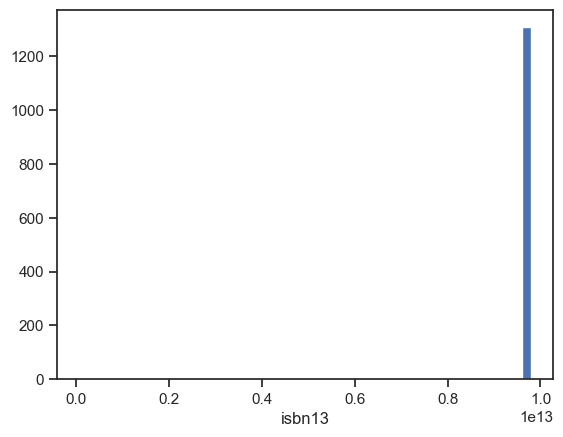

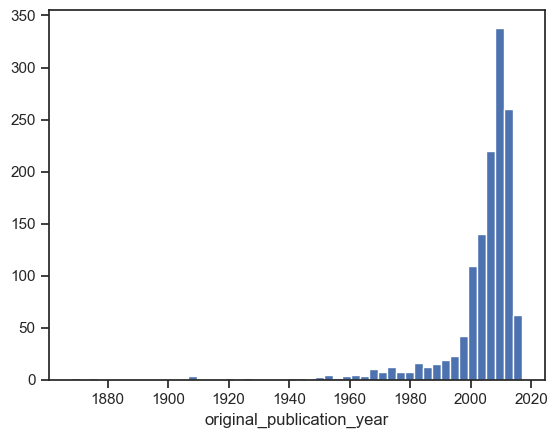

In [16]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [40]:
data_num_publications = data_num[['isbn13']]
data_num_publications.head()

,isbn13
0,9.780439e+12
1,9.780440e+12
2,9.780316e+12
3,9.780525e+12
4,9.780062e+12


In [22]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [23]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_publications)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [32]:
strategies=['mean', 'median', 'most_frequent']

In [25]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_publications)
    return data_num_imp[mask_missing_values_only]

In [26]:
strategies[0], test_num_impute(strategies[0])

('mean', array([2003.42264989, 2003.42264989, 2003.42264989]))

In [27]:
strategies[2], test_num_impute(strategies[2])

('most_frequent', array([2011., 2011., 2011.]))

In [35]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [36]:
data[['isbn13']].describe()

,isbn13
count,1.310000e+03
mean,9.766700e+12
std,3.572069e+11
min,7.678361e+10
25%,9.780152e+12
50%,9.780440e+12
75%,9.780805e+12
max,9.788424e+12


In [37]:
test_num_impute_col(data, 'isbn13', strategies[0])

('isbn13', 'mean', 44, 9766699633185.96, 9766699633185.96)

In [38]:
test_num_impute_col(data, 'isbn13', strategies[1])

('isbn13', 'median', 44, 9780439858030.0, 9780439858030.0)

In [39]:
test_num_impute_col(data, 'isbn13', strategies[2])

('isbn13', 'most_frequent', 44, 9780060288140.0, 9780060288140.0)

#### Обработка пропусков в категориальных данных

In [41]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка isbn. Тип данных object. Количество пустых значений 52, 3.84%.
Колонка original_title. Тип данных object. Количество пустых значений 52, 3.84%.
Колонка language_code. Тип данных object. Количество пустых значений 109, 8.05%.


In [44]:
cat_temp_data = data[['language_code']]
cat_temp_data.head()

,language_code
0,eng
1,eng
2,en-US
3,eng
4,eng


In [45]:
cat_temp_data['language_code'].unique()

array(['eng', 'en-US', nan, 'en-CA', 'en-GB', 'ger', 'spa', 'ind'],
      dtype=object)

In [46]:
cat_temp_data[cat_temp_data['language_code'].isnull()].shape

(109, 1)

In [47]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['eng'],
       ['eng'],
       ['en-US'],
       ...,
       ['eng'],
       ['eng'],
       ['eng']], dtype=object)

In [48]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['en-CA', 'en-GB', 'en-US', 'eng', 'ger', 'ind', 'spa'],
      dtype=object)

In [49]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['eng'],
       ['eng'],
       ['en-US'],
       ...,
       ['eng'],
       ['eng'],
       ['eng']], dtype=object)

In [50]:
np.unique(data_imp3)

array(['NA', 'en-CA', 'en-GB', 'en-US', 'eng', 'ger', 'ind', 'spa'],
      dtype=object)

In [51]:
data_imp3[data_imp3=='NA'].size

109

## Преобразование категориальных признаков в числовые

In [52]:
cat_enc = pd.DataFrame({'language_code':data_imp2.T[0]})
cat_enc

,language_code
0,eng
1,eng
2,en-US
3,eng
4,eng
...,...
1349,eng
1350,en-US
1351,eng
1352,eng


### Кодирование категорий целочисленными значениями (label encoding)

#### Использование LabelEncoder

In [53]:
from sklearn.preprocessing import LabelEncoder

In [54]:
cat_enc['language_code'].unique()

array(['eng', 'en-US', 'en-CA', 'en-GB', 'ger', 'spa', 'ind'],
      dtype=object)

In [55]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['language_code'])

In [56]:
# Наименования категорий в соответствии с порядковыми номерами

# Свойство называется classes, потому что предполагается что мы решаем 
# задачу классификации и каждое значение категории соответствует 
# какому-либо классу целевого признака

le.classes_

array(['en-CA', 'en-GB', 'en-US', 'eng', 'ger', 'ind', 'spa'],
      dtype=object)

In [57]:
cat_enc_le

array([3, 3, 2, ..., 3, 3, 3])

In [58]:
np.unique(cat_enc_le)

array([0, 1, 2, 3, 4, 5, 6])

In [60]:
# В этом примере видно, что перед кодированием 
# уникальные значения признака сортируются в лексикографиеском порядке
le.inverse_transform([  0,   1,   2,   3,   4,   5,   6])

array(['en-CA', 'en-GB', 'en-US', 'eng', 'ger', 'ind', 'spa'],
      dtype=object)

#### Использование OrdinalEncoder

In [61]:
from sklearn.preprocessing import OrdinalEncoder

In [62]:
data_oe = data[['original_title', 'authors', 'average_rating']]
data_oe.head()

,original_title,authors,average_rating
0,The Hunger Games,Suzanne Collins,4.34
1,Harry Potter and the Philosopher's Stone,"J.K. Rowling, Mary GrandPré",4.44
2,Twilight,Stephenie Meyer,3.57
3,The Fault in Our Stars,John Green,4.26
4,Divergent,Veronica Roth,4.24


In [63]:
imp4 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_oe_filled = imp4.fit_transform(data_oe)
data_oe_filled

array([['The Hunger Games', 'Suzanne Collins', 4.34],
       ["Harry Potter and the Philosopher's Stone",
        'J.K. Rowling, Mary GrandPré', 4.44],
       ['Twilight', 'Stephenie Meyer', 3.57],
       ...,
       ['Dangerous Girls', 'Abigail Haas, Abby McDonald', 4.14],
       ['Magonia', 'Maria Dahvana Headley', 3.6],
       ['Wild Cards', 'Simone Elkeles', 3.95]], dtype=object)

In [64]:
oe = OrdinalEncoder()
cat_enc_oe = oe.fit_transform(data_oe_filled)
cat_enc_oe

array([[ 963.,  523.,   94.],
       [ 404.,  193.,  104.],
       [1212.,  517.,   17.],
       ...,
       [ 206.,    3.,   74.],
       [ 539.,  363.,   20.],
       [1263.,  508.,   55.]])

In [65]:
# Уникальные значения 1 признака
np.unique(cat_enc_oe[:, 0])

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 1.287e+03, 1.288e+03,
       1.289e+03])

In [66]:
# Уникальные значения 2 признака
np.unique(cat_enc_oe[:, 1])

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [67]:
# Уникальные значения 3 признака
np.unique(cat_enc_oe[:, 2])

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.])

In [68]:
# Наименования категорий в соответствии с порядковыми номерами
oe.categories_

[array([' A Monster Calls ', ' Burned (Burned, #1)', ' The Sea of Trolls',
        ..., 'スペシャル·エー', 'ラブ★コン 1', '彼氏彼女の事情 #1'], dtype=object),
 array(['A.C. Gaughen', 'A.G. Howard', 'A.S. King',
        'Abigail Haas, Abby McDonald', 'Adam Gidwitz', 'Aimee Carter',
        'Alex   Sanchez', 'Alex Flinn', 'Alexander Gordon Smith',
        'Alexandra Adornetto', 'Alexandra Bracken', 'Alison Croggon',
        'Alison Goodman', 'Ally Carter', 'Ally Condie', 'Alwyn Hamilton',
        'Alyson Noel', 'Amanda Hocking', 'Amie Kaufman, Jay Kristoff',
        'Amie Kaufman, Jay Kristoff, Marie Lu',
        'Amie Kaufman, Meagan Spooner', 'Amy Efaw', 'Amy Ewing',
        'Amy Plum', 'Amy Tintera', 'Amy Zhang', 'Andrea Cremer',
        'Andrew  Smith', 'Andrew Clements', 'Angela Johnson', 'Angie Sage',
        'Angie Sage, Mark Zug', 'Angie Thomas', 'Ann Aguirre',
        'Ann Brashares', 'Ann M. Martin', 'Anna Banks', 'Anna Carey',
        'Anna Godbersen', 'Anne McCaffrey', 'Annette Curtis Klause',

In [69]:
# Обратное преобразование
oe.inverse_transform(cat_enc_oe)

array([['The Hunger Games', 'Suzanne Collins', 4.34],
       ["Harry Potter and the Philosopher's Stone",
        'J.K. Rowling, Mary GrandPré', 4.44],
       ['Twilight', 'Stephenie Meyer', 3.57],
       ...,
       ['Dangerous Girls', 'Abigail Haas, Abby McDonald', 4.14],
       ['Magonia', 'Maria Dahvana Headley', 3.6],
       ['Wild Cards', 'Simone Elkeles', 3.95]], dtype=object)

### Кодирование шкал порядка

In [70]:
# пример шкалы порядка 'small' < 'medium' < 'large'
sizes = ['small', 'medium', 'large', 'small', 'medium', 'large', 'small', 'medium', 'large', 'medium', 'large']

In [71]:
pd_sizes = pd.DataFrame(data={'sizes':sizes})
pd_sizes

,sizes
0,small
1,medium
2,large
3,small
4,medium
5,large
6,small
7,medium
8,large
9,medium


In [72]:
pd_sizes['sizes_codes'] = pd_sizes['sizes'].map({'small':1, 'medium':2, 'large':3})
pd_sizes

,sizes,sizes_codes
0,small,1
1,medium,2
2,large,3
3,small,1
4,medium,2
5,large,3
6,small,1
7,medium,2
8,large,3
9,medium,2


In [73]:
pd_sizes['sizes_decoded'] = pd_sizes['sizes_codes'].map({1:'small', 2:'medium', 3:'large'})
pd_sizes

,sizes,sizes_codes,sizes_decoded
0,small,1,small
1,medium,2,medium
2,large,3,large
3,small,1,small
4,medium,2,medium
5,large,3,large
6,small,1,small
7,medium,2,medium
8,large,3,large
9,medium,2,medium


### Кодирование категорий наборами бинарных значений - one-hot encoding

In [74]:
from sklearn.preprocessing import OneHotEncoder

In [75]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['language_code']])

In [76]:
cat_enc.shape

(1354, 1)

In [77]:
cat_enc_ohe.shape

(1354, 7)

In [78]:
cat_enc_ohe

<1354x7 sparse matrix of type '<class 'numpy.float64'>'
	with 1354 stored elements in Compressed Sparse Row format>

In [79]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0.]])

In [80]:
cat_enc.head(10)

,language_code
0,eng
1,eng
2,en-US
3,eng
4,eng
5,eng
6,eng
7,eng
8,eng
9,eng


### Pandas get_dummies - быстрый вариант one-hot кодирования

In [81]:
pd.get_dummies(cat_enc).head()

,language_code_en-CA,language_code_en-GB,language_code_en-US,language_code_eng,language_code_ger,language_code_ind,language_code_spa
0,False,False,False,True,False,False,False
1,False,False,False,True,False,False,False
2,False,False,True,False,False,False,False
3,False,False,False,True,False,False,False
4,False,False,False,True,False,False,False


In [82]:
pd.get_dummies(cat_temp_data, dummy_na=True).head()

,language_code_en-CA,language_code_en-GB,language_code_en-US,language_code_eng,language_code_ger,language_code_ind,language_code_spa,language_code_nan
0,False,False,False,True,False,False,False,False
1,False,False,False,True,False,False,False,False
2,False,False,True,False,False,False,False,False
3,False,False,False,True,False,False,False,False
4,False,False,False,True,False,False,False,False


### MinMax масштабирование

In [83]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [84]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['average_rating']])

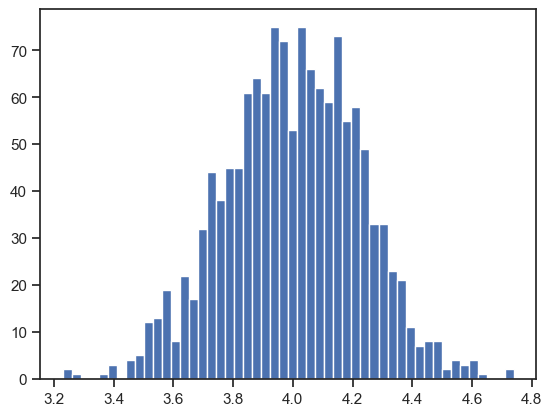

In [85]:
plt.hist(data['average_rating'], 50)
plt.show()

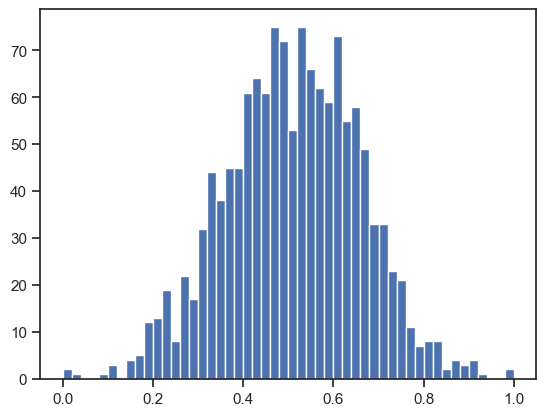

In [86]:
plt.hist(sc1_data, 50)
plt.show()

### Масштабирование данных на основе Z-оценки - StandardScaler

In [87]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['average_rating']])

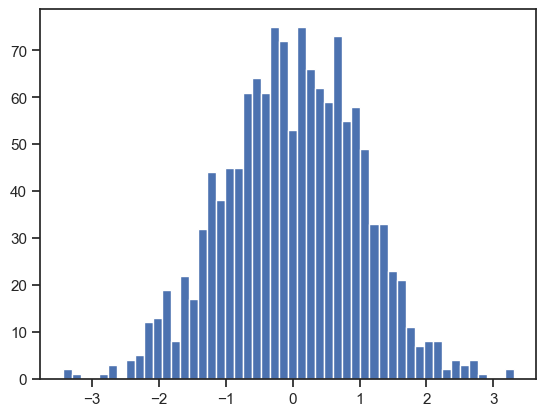

In [88]:
plt.hist(sc2_data, 50)
plt.show()